<a href="https://colab.research.google.com/github/syuan0525/Deeplearning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train,y_train),(x_test,y_test) = load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


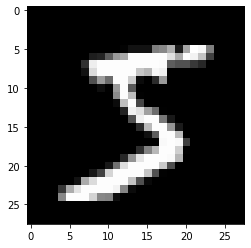

In [3]:
import matplotlib.pyplot as plt
print(y_train[0])
#cmap="YlGn_r"
plt.imshow(x_train[0],cmap="gray")

In [ ]:
import pandas as pd
pd.DataFrame(x_train[0])

In [5]:
#1.模型(Model,Sequential)2.層
from tensorflow.keras.models import Sequential
#Dense:稠密層,全連接層(Fully-Connected)
from tensorflow.keras.layers import Dense

layers = [
      #784*256(全連接) + 256(bias) = 200960
      Dense(256,activation="relu",input_dim=784),
      #256*10(全連接) + 10(bias) = 2570
      Dense(10,activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
#loss: 分類=cross entropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [7]:
#y:One-Hot Encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# x: 28 * 28 ->784
#reshape:留一個位置填-1,叫numpy幫你算
x_train_norm = x_train.reshape(60000,-1)/255.0
x_test_norm = x_test.reshape(10000,-1)/255.0
print(x_train_norm.shape)
print(x_test_norm.shape)
# print(x_train_norm[0])

(60000, 784)
(10000, 784)


In [ ]:
#batch_size:看多少筆資料調整一次梯度(10-200)
# = 200:54000(訓練資料)/200 -> 270(次)梯度調整
# = epochs:54000筆看幾次
# = 10: 270 * 10 (次) 梯度調整
# verbose: 1(進度條) 0(啥都沒) 2(不會有進度條)
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callbacks=[
  EarlyStopping(patience=5,restore_best_weights=True),
  ModelCheckpoint("mnist.h5",save_best_only=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)

In [10]:
model.evaluate(x_test_norm,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9788


[0.06801573187112808, 0.9787999987602234]

In [ ]:
from sklearn.metrics import confusion_matrix
proba = model.predict(x_test_norm)
pre = proba.argmax(axis=1)
mat = confusion_matrix(y_test,pre)
pd.DataFrame(mat,
      index=["{}(正確)".format(i) for i in range(10)],
      columns=["{}(預測)".format(i) for i in range(10)])

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x_train[0])
plt.subplot(1,2,2)
plt.imshow(x_train[1])

In [ ]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
pre_false_img = x_test[idx]
pre_false_val = pre[idx]
pre_false_ori = y_test[idx]

plt.figure(figsize=(10,35))
width = 10
height = len(idx)//width + 1
for i in range(len(idx)):
  plt.subplot(height,width,i+1)
  t = "[o]:{}\n[p]:{}".format(pre_false_ori[i],
                 pre_false_val[i])
  plt.title(t)
  plt.axis("off")
  plt.imshow(pre_false_img[i],cmap="gray")